Step 3 to 5

In [17]:
# Created by: Youpele Michael (adapted from Roney Mathew)

In [5]:
import sqlite3
import pandas as pd
from npfeintool import FeatEx
from npfeintool import CON
from npfeintool.analyzer import Analyzer

In [6]:
#save the names of database files in an array
name_of_db_1 = ["DiCo_digital_coil_M1_M2_Stempel_1_punches"]

In [7]:
#current indices at which the segments should be cutted
cutting_index = [1500, 1500, 1500]


In [8]:
#iterating over all database files and extracting features for every single database
for name, index in zip(name_of_db_1, cutting_index):

    #load data into a dataframe
    df = pd.DataFrame()
    df = CON.load_all_segments("", name)

    #cut dataFrame at cutting_index
    df_feature_extraction = df.iloc[:-(df.shape[0]-index)]

    df_features=FeatEx.get_ts_features(df_feature_extraction)

    print(df_features)


start loading DiCo_digital_coil_M1_M2_Stempel_1_punches.db
Finished loading all 294 segments!


Feature Extraction: 100%|██████████| 20/20 [17:51<00:00, 32.82s/it]  


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.337344e+09                     24897.05400   
1              3.430262e+09                     26352.57408   
10             1.630548e+09                     26888.81832   
100            2.853504e+09                     31127.70136   
101            2.343985e+09                     30987.25644   
102            2.389446e+09                     28727.37000   
103            2.424437e+09                     29238.07880   
104            2.233016e+09                     29455.13004   
105            2.423936e+09                     32353.40248   
106            2.240004e+09                     35507.02932   
107            2.257234e+09                     29940.30340   
108            2.351240e+09                     28280.49980   
109            2.331792e+09                     28829.51176   
11             1.707422e+09

In [9]:
#get the features table
features_segment=FeatEx.featuretable(df_feature_extraction)
print(features_segment)


      grad_max         max         mean      median         min         std  \
0     76.60632  1721.56368  1488.152735  1491.74472  1236.39032  101.511264   
1     76.60632  1747.09912  1507.219197  1517.28016  1044.87452  123.051268   
2     63.83860  1683.26052  1451.271048  1453.44156  1108.71312  114.972232   
3    102.14176  1542.81560  1315.916192  1312.99664  1006.57136  120.027861   
4     63.83860  1530.04788  1293.078997  1300.22892   993.80364  112.399019   
5     63.83860  1427.90612  1211.254935  1210.85488   929.96504  111.058709   
6     76.60632  1415.13840  1207.790627  1210.85488   917.19732  112.675391   
7     89.37404  1364.06752  1141.262294  1147.01628   866.12644  119.839613   
8     89.37404  1364.06752  1140.045105  1147.01628   866.12644  120.925668   
9     89.37404  1300.22892  1086.088720  1095.94540   776.75240  124.779905   
10    76.60632  1274.69348  1035.800927  1032.10680   751.21696  118.986784   
11    76.60632  1287.46120  1060.442627  1070.40996 

In [11]:

#setup feature table first with standard statistical methods
df_features = FeatEx.featuretable(df_feature_extraction)

#save the feature extraction table in SQL format for later using changepoint detection on them 
featEx_sql_database = "FeatEx_table_" + name + ".db"

#data will be stored in featEx_sql_database
conn = sqlite3.connect(featEx_sql_database)
    
#use function df_tosql to export the feature dataframe to a sql
table_name = "FeatEx_table_" + name
df_features.to_sql(name = table_name, con = conn)


In [13]:
import sqlite3
import pandas as pd
from npfeintool import FeatEx
from npfeintool import CON
from npfeintool.analyzer import Analyzer

In [14]:
#save the names of database files in an array, important if you want to change them without .db at the end
names_databases = ["DiCo_digital_coil_M1_M2_Stempel_1_punches", 
                    "DiCo_digital_coil_M2_M3_Stempel_1_punches", 
                    "DiCo_digital_coil_M3_M4_Stempel_1_punches",
                    "DiCo_digital_coil_M4_M5_Stempel_1_punches",
                    "DiCo_digital_coil_M5_M6_Stempel_1_punches",
                    "DiCo_digital_coil_M6_M7_Stempel_1_punches",
                    "DiCo_digital_coil_M7_M8_Stempel_1_punches",
                    "DiCo_digital_coil_M8_M9_Stempel_1_punches",
                    "DiCo_digital_coil_M9_M10_Stempel_1_punches",
                    "DiCo_digital_coil_M10_5_M11_Stempel_1_punches",
                    "DiCo_digital_coil_M10_M10_5_Stempel_1_punches",
                    ]

#current indices at which the segments should be cutted
cutting_index = [1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,]


#iterating over all database files and extracting features for every single database
for name, index in zip(names_databases, cutting_index):

    #load data into a dataframe
    df = pd.DataFrame()
    df = CON.load_all_segments("", name)
    
    
    #cut dataFrame at cutting_index
    df_feature_extraction = df.iloc[:-(df.shape[0]-index)]

    df_features=FeatEx.get_ts_features(df_feature_extraction)

    print(df_features)
    

start loading DiCo_digital_coil_M1_M2_Stempel_1_punches.db
Finished loading all 294 segments!


Feature Extraction: 100%|██████████| 20/20 [16:19<00:00, 31.67s/it]


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.337344e+09                     24897.05400   
1              3.430262e+09                     26352.57408   
10             1.630548e+09                     26888.81832   
100            2.853504e+09                     31127.70136   
101            2.343985e+09                     30987.25644   
102            2.389446e+09                     28727.37000   
103            2.424437e+09                     29238.07880   
104            2.233016e+09                     29455.13004   
105            2.423936e+09                     32353.40248   
106            2.240004e+09                     35507.02932   
107            2.257234e+09                     29940.30340   
108            2.351240e+09                     28280.49980   
109            2.331792e+09                     28829.51176   
11             1.707422e+09

Finished loading all 140 segments!


Feature Extraction: 100%|██████████| 20/20 [08:26<00:00, 25.32s/it]


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.267883e+09                     29110.40160   
1              3.230317e+09                     28331.57068   
10             2.599507e+09                     30629.76028   
100            3.777170e+09                     28408.17700   
101            3.810798e+09                     29455.13004   
102            3.397354e+09                     28574.15736   
103            3.254720e+09                     29531.73636   
104            3.189303e+09                     29442.36232   
105            3.071429e+09                     29787.09076   
106            3.075600e+09                     29059.33072   
107            2.917423e+09                     28918.88580   
108            3.096149e+09                     28867.81492   
109            3.033592e+09                     31280.91400   
11             2.570543e+09

Finished loading all 246 segments!


Feature Extraction: 100%|██████████| 19/19 [15:56<00:00, 36.60s/it]


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.361448e+09                     34830.34016   
1              2.718597e+09                     35162.30088   
10             2.378849e+09                     29940.30340   
100            3.649286e+09                     27591.04292   
101            3.356841e+09                     30106.28376   
102            3.122877e+09                     28689.06684   
103            2.963594e+09                     28689.06684   
104            2.711403e+09                     29110.40160   
105            2.919148e+09                     29429.59460   
106            2.797230e+09                     30374.40588   
107            2.927747e+09                     28369.87384   
108            2.898533e+09                     29646.64584   
109            3.053796e+09                     29084.86616   
11             2.715424e+09

Finished loading all 426 segments!


Feature Extraction: 100%|██████████| 20/20 [33:12<00:00, 73.17s/it]  


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.648433e+09                     33821.69028   
1              2.972490e+09                     32608.75688   
10             2.782227e+09                     28765.67316   
100            3.389636e+09                     30399.94132   
101            3.473957e+09                     30808.50836   
102            3.340420e+09                     36681.65956   
103            3.396425e+09                     33285.44604   
104            3.498993e+09                     32927.94988   
105            3.472966e+09                     34804.80472   
106            3.449630e+09                     32876.87900   
107            3.407509e+09                     29965.83884   
108            3.528407e+09                     30655.29572   
109            3.539851e+09                     30821.27608   
11             2.742037e+09

Finished loading all 261 segments!


Feature Extraction: 100%|██████████| 20/20 [17:31<00:00, 28.71s/it]  


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.066571e+09                     28676.29912   
1              2.624250e+09                     28254.96436   
10             2.551314e+09                     34370.70224   
100            2.825287e+09                     32685.36320   
101            2.921859e+09                     30157.35464   
102            2.881822e+09                     29863.69708   
103            3.077436e+09                     30029.67744   
104            2.970952e+09                     30591.45712   
105            3.071054e+09                     29531.73636   
106            2.878274e+09                     28280.49980   
107            3.028659e+09                     29978.60656   
108            2.900941e+09                     29276.38196   
109            3.027108e+09                     29506.20092   
11             2.501352e+09

Finished loading all 167 segments!


Feature Extraction: 100%|██████████| 19/19 [09:23<00:00, 22.62s/it]


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.646744e+09                     26378.10952   
1              2.667168e+09                     29965.83884   
10             2.652052e+09                     30859.57924   
100            3.410606e+09                     28842.27948   
101            3.393907e+09                     30553.15396   
102            3.493393e+09                     29518.96864   
103            3.387660e+09                     29799.85848   
104            2.857004e+09                     29135.93704   
105            2.184388e+09                     29480.66548   
106            2.079000e+09                     30438.24448   
107            2.255858e+09                     30987.25644   
108            2.375874e+09                     30055.21288   
109            2.327298e+09                     31880.99684   
11             2.572820e+09

Finished loading all 207 segments!


Feature Extraction: 100%|██████████| 19/19 [3:51:09<00:00, 78.33s/it]    


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.942920e+09                     28510.31876   
1              2.979325e+09                     31166.00452   
10             2.690521e+09                     30387.17360   
100            3.154840e+09                     33425.89096   
101            3.237109e+09                     33911.06432   
102            3.137532e+09                     34932.48192   
103            3.028429e+09                     32685.36320   
104            3.200013e+09                     32161.88668   
105            3.199116e+09                     31932.06772   
106            3.165122e+09                     31127.70136   
107            3.052186e+09                     31076.63048   
108            3.135403e+09                     31166.00452   
109            3.190204e+09                     31395.82348   
11             2.760119e+09

Finished loading all 259 segments!


Feature Extraction: 100%|██████████| 20/20 [13:43<00:00, 24.92s/it]


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.646798e+09                     32583.22144   
1              2.992759e+09                     35813.45460   
10             2.696142e+09                     29825.39392   
100            2.183709e+09                     29301.91740   
101            2.099608e+09                     29889.23252   
102            2.056174e+09                     30604.22484   
103            2.087981e+09                     30157.35464   
104            2.086882e+09                     29659.41356   
105            2.157614e+09                     29327.45284   
106            2.203167e+09                     28420.94472   
107            2.101960e+09                     30067.98060   
108            2.067346e+09                     30297.79956   
109            2.081873e+09                     29391.29144   
11             2.834721e+09

Finished loading all 243 segments!


Feature Extraction: 100%|██████████| 20/20 [18:36<00:00, 26.67s/it]


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.481381e+09                     28523.08648   
1              2.307493e+09                     29838.16164   
10             2.276803e+09                     30489.31536   
100            2.658095e+09                     29863.69708   
101            2.579596e+09                     29850.92936   
102            2.602753e+09                     31740.55192   
103            2.631937e+09                     29991.37428   
104            2.598500e+09                     35315.51352   
105            2.590803e+09                     31587.33928   
106            2.618878e+09                     31446.89436   
107            2.639283e+09                     32493.84740   
108            2.703903e+09                     30272.26412   
109            2.712037e+09                     30655.29572   
11             2.158866e+09

Finished loading all 391 segments!


Feature Extraction: 100%|██████████| 20/20 [21:38<00:00, 41.77s/it]  


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              4.234180e+09                     28599.69280   
1              2.901495e+09                     29659.41356   
10             2.722505e+09                     29097.63388   
100            3.017981e+09                     31140.46908   
101            3.031778e+09                     31600.10700   
102            3.053422e+09                     30731.90204   
103            2.930239e+09                     29174.24020   
104            2.935343e+09                     29940.30340   
105            2.992922e+09                     29927.53568   
106            2.991417e+09                     29876.46480   
107            2.856678e+09                     29263.61424   
108            2.798631e+09                     28931.65352   
109            3.559503e+09                     30680.83116   
11             2.585065e+09

Finished loading all 141 segments!


Feature Extraction: 100%|██████████| 20/20 [07:21<00:00, 22.09s/it]


feature extraction finished
variable  value__abs_energy  value__absolute_sum_of_changes  \
id                                                            
0              3.508923e+09                     29187.00792   
1              2.255802e+09                     30233.96096   
10             2.209360e+09                     31778.85508   
100            2.774988e+09                     28548.62192   
101            2.821778e+09                     28906.11808   
102            2.872537e+09                     28127.28716   
103            2.879809e+09                     27769.79100   
104            2.786852e+09                     32264.02844   
105            2.916588e+09                     35315.51352   
106            2.982095e+09                     32008.67404   
107            2.854750e+09                     31459.66208   
108            3.973208e+09                     28408.17700   
109            2.917075e+09                     30527.61852   
11             2.062103e+09

In [15]:
#setup feature table first with standard statistical methods
df_features = FeatEx.featuretable(df_feature_extraction)

#save the feature extraction table in SQL format for later using changepoint detection on them 
featEx_sql_database = "FeatEx_table_" + name + ".db"

#data will be stored in featEx_sql_database
conn = sqlite3.connect(featEx_sql_database)
    
#use function df_tosql to export the feature dataframe to a sql
table_name = "FeatEx_table_" + name
df_features.to_sql(name = table_name, con = conn)

In [16]:
# PCA

In [125]:
#save the names of database files in an array, important if you want to change them without .db at the end
names_databases = ["FeatEx_table_DiCo_digital_coil_M10_M10_5_Stempel_1_punches"]

#current indices at which the segments should be cutted
cutting_index = [1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,]


#iterating over all database files and extracting features for every single database
for name, index in zip(names_databases, cutting_index):

    
    #load data into a dataframe
    df = pd.DataFrame()
    df = CON.load_all_segments("", name)
    
    
    
    
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler()
df = scaled_df.fit_transform(df)



 # Applying PCA
from sklearn.decomposition import PCA # importing the lib of pca
pca = PCA(n_components = 2)
X = pca.fit_transform(df)

explained_variance_ = pca.explained_variance_

explained_variance_ratio_ = pca.explained_variance_ratio_ 

print (explained_variance_ratio_)
print (explained_variance_)


start loading FeatEx_table_DiCo_digital_coil_M10_M10_5_Stempel_1_punches.db
Finished loading all 8 segments!
[0.51767093 0.33931494]
[3.64995516 2.39241622]


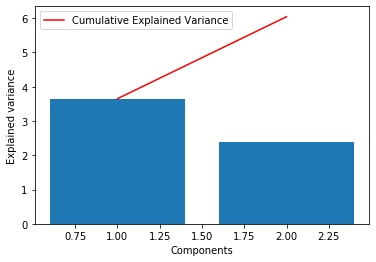

In [126]:
# explained_variance_ plot

plt.bar(range(1,len(explained_variance_ )+1),explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(explained_variance_ )+1),
         np.cumsum(explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

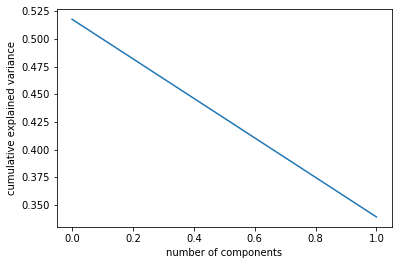

In [127]:
# explained_variance_ratio_ plot

plt.plot(explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

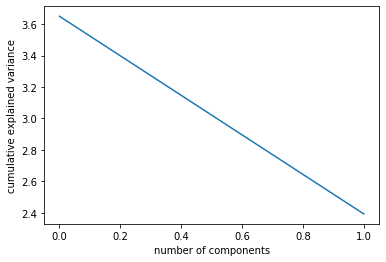

In [128]:
# Scree plot

plt.plot(explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

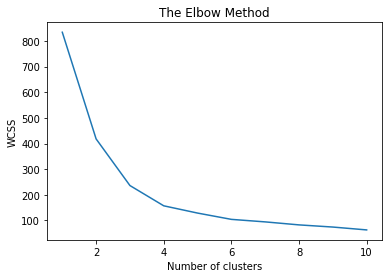

In [129]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Using the elbow method to find the number of clusters
from sklearn.cluster import KMeans # importing the KMeans class from its lib
wcss = [] # wcss is used to find the optimal number of clusters
for i in range (1,11): # creating a for loop
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 300, n_init= 10, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

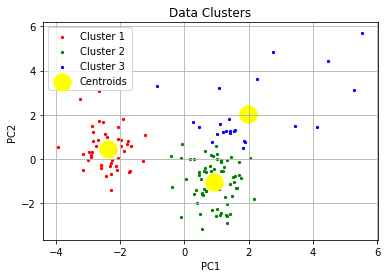

In [130]:
# Applying kmeans to the datasets

kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init= 10, random_state= 0) # Fitting to the right number of clusters predicted by the elbow method above
y_kmeans = kmeans.fit_predict(X) 

# Visualing the clusters 
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s =5, c= 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s =5, c= 'green', label = 'Cluster 2') 
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s =5, c= 'blue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s =5, c= 'cyan', label = 'Cluster 4') 
#plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s =100, c= 'pink', label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Data Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

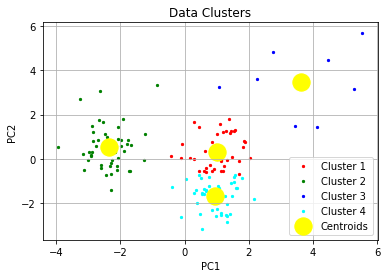

In [131]:
# 4 Clusters

# Applying kmeans to the datasets

kmeans = KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init= 10, random_state= 0) 
y_kmeans = kmeans.fit_predict(X) 

# Visualing the clusters 
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s =5, c= 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s =5, c= 'green', label = 'Cluster 2') 
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s =5, c= 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s =5, c= 'cyan', label = 'Cluster 4') 
#plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s =100, c= 'pink', label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Data Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

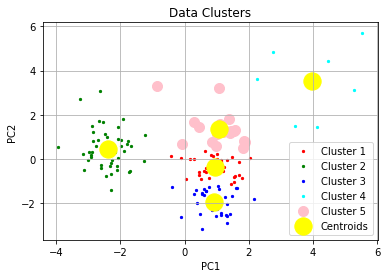

In [132]:
# 5 Clusters

# Applying kmeans to the datasets

kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init= 10, random_state= 0) 
y_kmeans = kmeans.fit_predict(X) 

# Visualing the clusters 
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s =5, c= 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s =5, c= 'green', label = 'Cluster 2') 
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s =5, c= 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s =5, c= 'cyan', label = 'Cluster 4') 
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s =100, c= 'pink', label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Data Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()